# Lab Notebook 5-6

In this notebook, we will apply the kNN and DT algorithm to a larger exoplanet dataset. We will then examine the effectiveness of the kNN model via a variety of metrics and diagnostics.

# Part 1: Explore data

Start by importing the same modules as in labs 3 and 4, set the matplotlib.rc for graphing, and read in **phl_exoplanet_catalog.csv** using pandas. Additionally, with pandas, use set_option to make sure that the maximum number of columns and rows displayed for our dataframes is 100. Also using set_option, set max_colwidth=100, which modifies the default column width.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as pch
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn

ExoPlanet = pd.read_csv("phl_exoplanet_catalog.csv")
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)
ExoPlanet

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


Find a way to print only the column names of the dataframe. These are the data's features.

In [2]:
columns = ExoPlanet.columns
columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

We want to start familiarizing ourselves with our data. Use "describe()" on the dataframe to see some summary statistics. Note down what each of these statistics mean.

In [3]:
ExoPlanet.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


- count - column count (ignoring NaNs)
- mean - average of column
- std - standard deviation of column
- min - minimum value in column
- 25% - the values around the lower quarter of the data
- 50% - the values around the centre of the data
- 75% - the values around the upper quarter of the data
- max - maximum value in column

We can group statistics by class. For each possible value of "P_HABITABLE" (0 = not habitable, 1 = possibly habitable, or 2 = probably habitable), display the count for each of the features.

In [4]:
ExoPlanet.groupby(['P_HABITABLE']).count()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
P_HABITABLE,,,,,,,,,,,,,,,,,,,,,
0,3993,3993,1575,1444,1444,3101,3067,3067,3993,3993,...,3993,3993,3666,3666,3993,3993,3993,3993,3993,3923
1,21,21,16,16,16,9,9,9,21,21,...,21,21,21,21,21,21,21,21,21,21
2,34,34,7,7,7,29,29,29,34,34,...,34,34,34,34,34,34,34,34,34,34


# Part 2: Modify data

## Step 2.1

We want a binary classification problem, so lump together "probably" (P_habitable=2) and "possibly" (P_habitable=1) habitable planets in a new dataframe. Check that the two classes are lumped together correctly.

In [5]:
ExoPlanet.loc[ ExoPlanet['P_HABITABLE'] == 2, 'P_HABITABLE'] = 1
ExoPlanet.groupby(['P_HABITABLE']).count()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
P_HABITABLE,,,,,,,,,,,,,,,,,,,,,
0,3993,3993,1575,1444,1444,3101,3067,3067,3993,3993,...,3993,3993,3666,3666,3993,3993,3993,3993,3993,3923
1,55,55,23,23,23,38,38,38,55,55,...,55,55,55,55,55,55,55,55,55,55


## Step 2.2

Let's simplify our data by only using the features 'S_MASS', 'P_PERIOD', and 'P_DISTANCE'. From the dataset created in step 2.1 create a new dataframe called "final_features" that is comprised of the columns 'S_MASS', 'P_PERIOD', and 'P_DISTANCE'. Display the first few rows.

In [6]:
final_features = ExoPlanet[['S_MASS', 'P_PERIOD','P_DISTANCE']]
final_features.head()

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.03000,1.324418
1,2.78,516.21997,1.534896
2,2.20,185.84000,0.830000
3,0.90,1773.40000,3.130558
4,1.08,798.50000,2.043792


Each column of a data frame is called a *series*. Create a new series named "targets" that is the column "P_HABITABLE". Display the first few rows.

In [7]:
targets = ExoPlanet["P_HABITABLE"]
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: P_HABITABLE, dtype: int64

## Step 2.3

We need to delete data points that contain missing (NaN) values. We can see that NaN values exist by comparing the shape of "final_features" with the count of non-NaN values (using "describe"). Complete these two steps below:

In [8]:
print(np.shape(final_features))
final_features.count()

(4048, 3)


S_MASS        3283
P_PERIOD      3938
P_DISTANCE    3978
dtype: int64

Count the number of NaN values in each column of "final_features" (hint: use isnull()). how many are there in each column?

In [9]:
final_features.isnull().sum()

S_MASS        765
P_PERIOD      110
P_DISTANCE     70
dtype: int64

Remove rows that have one or more NaN values (hint: use "dropna"):

In [10]:
final_features = final_features.dropna()
final_features.count()

S_MASS        3180
P_PERIOD      3180
P_DISTANCE    3180
dtype: int64

## Step 2.4

We will now search for outliers in the data and remove them. One quick way to check if there are any is to inspect the distribution of values in each column by creating a histogram. Do this for all three columns:

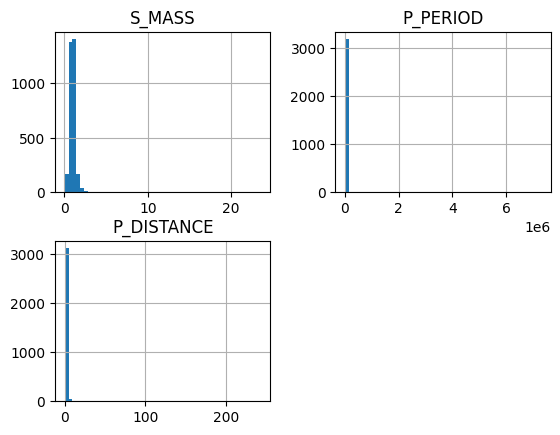

In [11]:
final_features.hist(bins = 50)
plt.show()

Due to the wide range of the x-axis (without specifying the range), we can infer that there are outliers. 

We can also tell that there are outliers when we look at the difference between the mean and median for each of the features. Do this below using "describe()".

In [12]:
final_features.describe()

,S_MASS,P_PERIOD,P_DISTANCE
count,3180.000000,3.180000e+03,3180.000000
mean,1.018217,2.763531e+03,0.677663
std,0.649450,1.298246e+05,5.962161
min,0.020000,9.070629e-02,0.004408
25%,0.820000,4.175797e+00,0.050453
50%,0.970000,1.155546e+01,0.097369
75%,1.130000,5.474041e+01,0.274581
max,23.560000,7.300000e+06,243.000000


Time to remove the outliers. 

With scipy.stats.zscore, you can compute the z-score of "final_features". The z-score is the distance between the observed data point and the population mean, scaled by the standard deviation. Keep all data with absolute value of the z-score less than 5 in the array final_features, and remove any data that does not fit this criteria.

Make sure that the data kept and removed in "targets" reflects this change.

Use "final_features.head(n=10)" to show the first 10 rows of "final_features".

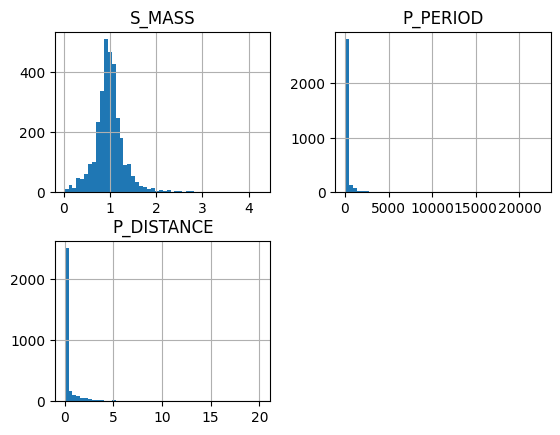

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.03000,1.324418
1,2.78,516.21997,1.534896
2,2.20,185.84000,0.830000
3,0.90,1773.40000,3.130558
4,1.08,798.50000,2.043792
5,2.30,993.30000,2.608320
7,0.99,30.35060,0.190168
8,1.54,452.80000,1.338399
9,1.54,883.00000,2.167464
14,0.48,416.00000,0.920000


In [13]:
from scipy.stats import zscore

final_features = final_features[np.abs(zscore(final_features).S_MASS)<5]
final_features = final_features[np.abs(zscore(final_features).P_PERIOD)<5]
final_features = final_features[np.abs(zscore(final_features).P_DISTANCE)<5]
targets        = targets[final_features.index.tolist()]
final_features.hist(bins = 50)
plt.show()
final_features.head(10)

As you should see above in "final_features" (and "targets"), the label for each row is not the true row number. In other words, the row label doesn't increase as 0,1,2,3,...

Reset the index of the data frame using "reset_index(drop=True)". This resets the index of the DataFrame, and inserts index into the dataframe columns.

Do the same for "targets".

In [14]:
final_features = final_features.reset_index(drop = True)
targets = targets.reset_index(drop = True)

final_features.head(10)

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.03000,1.324418
1,2.78,516.21997,1.534896
2,2.20,185.84000,0.830000
3,0.90,1773.40000,3.130558
4,1.08,798.50000,2.043792
5,2.30,993.30000,2.608320
6,0.99,30.35060,0.190168
7,1.54,452.80000,1.338399
8,1.54,883.00000,2.167464
9,0.48,416.00000,0.920000


# Part 3: Explore data (again)

## Step 3.1

We want to check the balance of the data set. Meaning, in "targets", how many ones versus zeros are there?

Print the sum of "targets" (sum of all the ones) divided by the length of "targets".

In [15]:
targets.sum()/targets.count()

0.016408961817608078

Also, try using "bincount" on "targets" to show the distribution of ones and zeros:

In [16]:
np.bincount(targets)

array([3117,   52])

Now we know that the data set is very imbalanced (many more zeros than ones). This means that we need to be careful when constructing our machine learning model; briefly explain why this is the case.

## Answer:



## Step 3.2

Concatenate "final_features" and "targets" without outliers:

In [17]:
data = pd.concat([final_features, targets], axis = 1)

Group the data by "P_HABITABLE", display make one row for P_HABITABLE=0 and another row for P_HABITABLE=1 and use the .describe() method to display summary statistics.

In [18]:
data.groupby(['P_HABITABLE']).describe()

S_MASS                                                       \
              count      mean       std   min   25%    50%     75%   max   
P_HABITABLE                                                                
0            3117.0  1.003718  0.341306  0.02  0.83  0.980  1.1400  4.26   
1              52.0  0.486538  0.285079  0.08  0.29  0.475  0.6975  1.12   

            P_PERIOD              ...                          P_DISTANCE  \
               count        mean  ...         75%          max      count   
P_HABITABLE                       ...                                       
0             3117.0  277.204442  ...   51.205300  22482.00000     3117.0   
1               52.0   91.035689  ...  132.521175    448.30356       52.0   

                                                                         \
                 mean       std       min       25%       50%       75%   
P_HABITABLE                                                               
0            0.519598  1.238380  0.004408  0.050230  0.095303  0.269078   
1            0.302263  0.276637  0.021493  0.093215  0.205800  0.450215   

                        
                   max  
P_HABITABLE             
0            20.131700  
1             1.190229  

[2 rows x 24 columns]

## Step 3.3

Plot the period of orbit as a function of the mass of the parent star. It should look like fig 3.1 in our textbook.

Make sure your graph:
- has a legend (habitable versus not habitable)
- is a scatter plot
- has data (habitable versus not habitable) differentiated by colour
- has a log y-scale
- includes axis labels

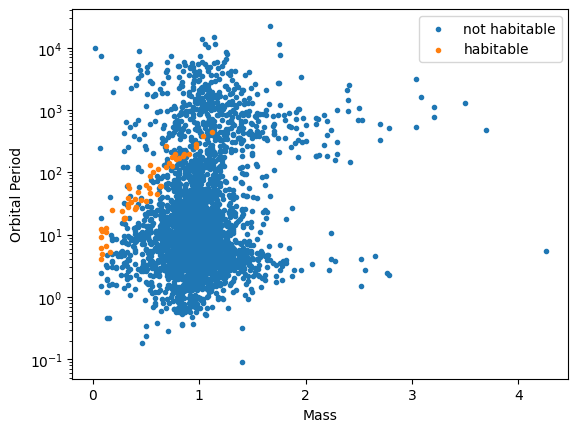

In [19]:
h_data = data[data.P_HABITABLE == 1]
n_data = data[data.P_HABITABLE == 0]
plt.scatter(n_data.S_MASS, n_data.P_PERIOD, label = "not habitable", marker = '.')
plt.scatter(h_data.S_MASS, h_data.P_PERIOD, label = "habitable", marker = '.')
plt.xlabel("Mass")
plt.ylabel("Orbital Period")
plt.yscale("log")
plt.legend()
plt.show()

# Part 4: Classification

## Step 4.1

Implement train_test_split features and targets. Fix the random state to 3, You can use the default test size, which is 25%. This process will give you Xtrain, Xtest, ytrain, and ytest. Print the shapes of Xtrain and Xtest.

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_features.to_numpy(), targets.to_numpy(), random_state = 3)

Create a machine learning model by calling "KNeighborsClassifier". Remember that for the kNN algorithm, it is important to standardize the data since it relies on the notion of a metric. To this end, you can use the RobustScaler utility from sklearn.preprocessing. It is also recommended to construct a pipeline with the classifier so that the data is automatically scaled before given to the classifier algorithm. You can use Pipeline from sklearn.pipeline for this. The concept is explained in Chapter 3.4.

In [21]:
from sklearn.pipeline import Pipeline
scaler = sklearn.preprocessing.RobustScaler()
model1 = neighbors.KNeighborsClassifier()
pipeline1 = Pipeline([('transformer', scaler), ('estimator', model1)]) 
model1 = pipeline1.fit(Xtrain, ytrain)

Let's see how many 1's ("Habitable") are predicted by our model. Count the number of ones in ytest, and then compare it to the number of ones in the y-array predicted from Xtest:

In [22]:
ypredict = model1.predict(Xtest)

print('habitable in ytest: ', np.sum(ytest))
print('habitable in ypredict: ', np.sum(ypredict))

habitable in ytest:  17
habitable in ypredict:  8


Let's check the performance of the classifier. Compute the accuracy, precision and recall scores using the **metrics** package for the test data. Also compute the performance of the "lazy" classifier that just assumes y=0 throughout. Any comments? What do these results mean for the success of our classifier? Can we improve our results by modifying the number of nearest neighbours in Step 4.1? Why or why not?

- our model is slightly better than the lazy classifier
- if our data mostly has zeros, increasng the number of nearest neighbours would likely predict zeros which would perform the same as the lazy classifier

In [23]:
accuracy  = sklearn.metrics.accuracy_score(ytest, ypredict)
precision  = sklearn.metrics.precision_score(ytest, ypredict)
recall    = sklearn.metrics.recall_score(ytest, ypredict)
lazy_a  = sklearn.metrics.accuracy_score(ytest, np.zeros(len(ytest)))
lazy_p  = sklearn.metrics.precision_score(ytest, np.zeros(len(ytest)),  zero_division=1)
lazy_r  = sklearn.metrics.recall_score(ytest, np.zeros(len(ytest)))

print(' model accuracy: {}'.format(accuracy))
print('"lazy" accuracy: {}'.format(lazy_a))

print(' model precision: {}'.format(precision))
print('"lazy" precision: {}'.format(lazy_p))

print(' model recall: {}'.format(recall))
print('"lazy" recall: {}'.format(lazy_r))

 model accuracy: 0.9810844892812106
"lazy" accuracy: 0.978562421185372
 model precision: 0.625
"lazy" precision: 1.0
 model recall: 0.29411764705882354
"lazy" recall: 0.0


## Step 4.2

Now let's plot the result. Use a scatter plot like in Step 3.3. Make sure that the training and testing points are represented by different shapes. Habitable and non-habitable points should be differentiated by colour as before. Label the axes and include a legend.

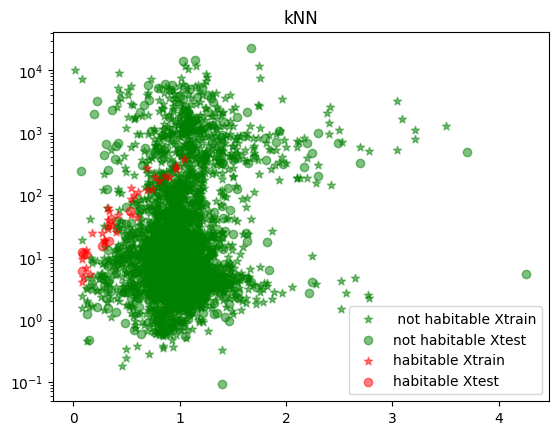

In [24]:
hXtrain = Xtrain[np.where(ytrain == 1)[0]]
nXtrain = Xtrain[np.where(ytrain == 0)[0]]
hXtest = Xtest[np.where(ypredict == 1)[0]]
nXtest = Xtest[np.where(ypredict == 0)[0]]


plt.scatter(nXtrain[:,0], nXtrain[:,1], label = ' not habitable Xtrain', marker = '*', color = 'green', alpha = 0.5)
plt.scatter(nXtest[:,0], nXtest[:,1], label = 'not habitable Xtest', marker = 'o', color = 'green', alpha = 0.5)
plt.scatter(hXtrain[:,0], hXtrain[:,1], label = 'habitable Xtrain', marker = '*', color = 'red', alpha = 0.5)
plt.scatter(hXtest[:,0], hXtest[:,1], label = 'habitable Xtest', marker = 'o', color = 'red', alpha = 0.5)
plt.title("kNN")
plt.yscale("log")
plt.legend()
plt.show()

## Step 4.3
Repeat steps 4.1 and 4.2 with the DecisionTreeClassifier, random_state=42. Any comments on the results?
 - our model is only as good as the lazy classifier

In [25]:
model2 =  DecisionTreeClassifier(random_state = 42)
pipeline2 = Pipeline([('transformer', scaler), ('estimator', model2)]) 
model2 = pipeline2.fit(Xtrain, ytrain)
ypredict = model.predict(Xtest)
print('habitable in ytest: ', np.sum(ytest))
print('habitable in ypredict: ', np.sum(ypredict))


accuracy  = sklearn.metrics.accuracy_score(ytest, ypredict)
precision  = sklearn.metrics.precision_score(ytest, ypredict)
recall    = sklearn.metrics.recall_score(ytest, ypredict)
lazy_a  = sklearn.metrics.accuracy_score(ytest, np.zeros(len(ytest)))
lazy_p  = sklearn.metrics.precision_score(ytest, np.zeros(len(ytest)),  zero_division=1)
lazy_r  = sklearn.metrics.recall_score(ytest, np.zeros(len(ytest)))

print(' model accuracy: {}'.format(accuracy))
print('"lazy" accuracy: {}'.format(lazy_a))

print(' model precision: {}'.format(precision))
print('"lazy" precision: {}'.format(lazy_p))

print(' model recall: {}'.format(recall))
print('"lazy" recall: {}'.format(lazy_r))


hXtest = Xtest[np.where(ypredict == 1)[0]]
nXtest = Xtest[np.where(ypredict == 0)[0]]


plt.scatter(nXtrain[:,0], nXtrain[:,1], label = ' not habitable Xtrain', marker = '*', color = 'green', alpha = 0.5)
plt.scatter(nXtest[:,0], nXtest[:,1], label = 'not habitable Xtest', marker = 'o', color = 'green', alpha = 0.5)
plt.scatter(hXtrain[:,0], hXtrain[:,1], label = 'habitable Xtrain', marker = '*', color = 'red', alpha = 0.5)
plt.scatter(hXtest[:,0], hXtest[:,1], label = 'habitable Xtest', marker = 'o', color = 'red', alpha = 0.5)
plt.yscale("log")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()

NameError: name 'model' is not defined

# Part 5: Cross-validation
Implement cross-validation on both models for the three metrics accuracy, precision, and recall with stratified k-folds, random shuffling, and 10 splits, random_state=10. What is k-fold validation, and what happens when stratification is applied? Report the mean CV score and the standard deviation. 

 - k-fold validation is dividing the data set in to k parts, and we use k-1 parts as training sets and 1 part as the test set
 - stratification ensures the ratio between habitable and non-habitable data remains the same in all k-1 training sets

In [ ]:
cv = sklearn.model_selection.StratifiedKFold(shuffle = True, n_splits = 10, random_state = 10) 
scores = sklearn.model_selection.cross_val_score(model1, final_features, targets,  cv = cv, scoring = 'accuracy')
scores2 = sklearn.model_selection.cross_val_score(model2, final_features, targets,  cv = cv, scoring = 'accuracy')
print('mean_accuracy_kNN: ', np.mean(scores))
print('std_accuracy_kNN:  ', np.std(scores))
print('mean_accuracy_decisiontree: ', np.mean(scores2))
print('std_accuracy_decisiontree:  ', np.std(scores2))
print("")

scores = sklearn.model_selection.cross_val_score(model1, final_features, targets,  cv = cv, scoring = 'precision')
scores2 = sklearn.model_selection.cross_val_score(model2, final_features, targets,  cv = cv, scoring = 'precision')
print('mean_precision_kNN: ', np.mean(scores))
print('std_precision_kNN:  ', np.std(scores))
print('mean_precision_decisiontree: ', np.mean(scores2))
print('std_precision_decisiontree:  ', np.std(scores2))
print("")

scores = sklearn.model_selection.cross_val_score(model1, final_features, targets,  cv = cv, scoring = 'recall')
scores2 = sklearn.model_selection.cross_val_score(model2, final_features, targets,  cv = cv, scoring = 'recall')
print('mean_recall_kNN: ', np.mean(scores))
print('std_recall_kNN:  ', np.std(scores))
print('mean_recall_decisiontree: ', np.mean(scores2))
print('std_recall_decisiontree:  ', np.std(scores2))


# Part 6: Confusion Matrix

Construct the confusion matrices for the two classifiers from above. Please write code from scratch to compute the matrix elements, but feel free to check it against the function provided by sklearn.metrics. Use **cross_val_predict** to assemble the predictions of several folds. You can then use **ConfusionMatrixDisplay()** to visualize, or write your own plotting routine.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_matrix(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[true_negative, false_positive], [false_negative, true_positive]])

#KNN
y_pred_knn = cross_val_predict(model1, Xtest, ytest, cv=cv)

#confusion matrix comparison kNN
print(np.all(conf_matrix(ytest, y_pred_knn) == confusion_matrix(ytest, y_pred_knn)))

disp = ConfusionMatrixDisplay(conf_matrix(ytest, y_pred_knn))
disp.plot(cmap=plt.cm.Blues)

#TREE
y_pred_dt = cross_val_predict(model2, Xtest, ytest, cv=cv)

#confusion matrix comparison dT
print(np.all(conf_matrix(ytest, y_pred_dt) == confusion_matrix(ytest, y_pred_dt)))


disp = ConfusionMatrixDisplay(conf_matrix(ytest, y_pred_dt))
disp.plot(cmap=plt.cm.Greens)

plt.show()

# Part 7: ROC curve
Construct the ROC curves for both classifiers. Please use **sklearn's metrics.roc_curve()** to compute the points curve and then plot them. Also draw the ROC curve of a useless (i.e. random) classifier. Don't forget axis labels and a legend. Use cross_val_predict to obtain the probabilities of the predictions. Please also report the ROC AUC score for both classifiers as an average over the 10 folds, using **cross_val_score()**.


In [ ]:
#from sklearn import metrics

# kNN
ypredict1prob = cross_val_predict(model1, Xtest, ytest,method="predict_proba")

# dT
ypredict2prob = cross_val_predict(model2, Xtest, ytest,method="predict_proba")

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(ytest, ypredict1prob[:,1])
fpr_dt, tpr_dt, thresholds = metrics.roc_curve(ytest, ypredict2prob[:,1])


plt.plot([0,1],[0,1], label="Useless Classifier")
plt.plot(fpr_knn, tpr_knn, label="kNN")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

# Part 8: Learning curves

With the help of the module **learning_curve** from sklearn.model_selection, construct the learning curves for both classifiers as shown in Fig. 3.7.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model1, final_features, targets, train_sizes=np.linspace(0.1, 1.0, 5))
train_sizes2, train_scores2, test_scores2 = learning_curve(model2, final_features, targets, train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes,np.mean(train_scores,axis=1), label = "train")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = "test")
plt.title("kNN")
plt.xlabel("sample size")
plt.ylabel("score")
plt.legend()
plt.show()
plt.plot(train_sizes2,np.mean(train_scores2,axis=1), label = "train")
plt.plot(train_sizes2,np.mean(test_scores2,axis=1), label = "test")
plt.title("Decision Tree")
plt.xlabel("sample size")
plt.ylabel("score")
plt.legend()
plt.show()

In [ ]:
sklearn.model_selection.LearningCurveDisplay.from_estimator(model1, final_features, targets, cv=cv)
plt.title("kNN")
sklearn.model_selection.LearningCurveDisplay.from_estimator(model2, final_features, targets, cv=cv)
plt.title("Decision Tree")

# Part 9: Should we exist?
Use the kNN and DT classifiers that you trained above to predict the habitability of the earth.

In [ ]:
earth = np.array([[1, 365.25, 1]])

print("kNN: ")
print(model1.predict(earth))

print("Decision Tree: ")
print(model2.predict(earth))

print("we do not exist :(")